# <font color='289C4E'>Multi-Class Prediction of Cirrhosis Outcomes<font><a class='anchor' id='top'></a>

## <font color='289C4E'>`Task`: your task is to use a multi-class approach to predict the outcomes of patients with cirrhosis.<font><a class='anchor' id='top'></a>

### <font color='289C4E'>Understanding the task:<font><a class='anchor' id='top'></a>

<div class="alert alert-block alert-info"> 

📌 Objective is to use a multi-class approach to predict the outcomes of patients with cirrhosis.

What does this really mean? 

You need to predict the outcomes for patients with cirrhosis using a multi-class approach. The outcomes are divided into three categories, which I'll assume represent different statuses or stages of the disease (Status_C, Status_CL, Status_D).

The task you are working on is a multi-class classification problem in machine learning. Let's break down what this means:

Classification: This is a type of supervised learning where the goal is to predict the category or class to which a new observation belongs. It's "supervised" because the model is trained using a dataset that includes both the input features and the corresponding target labels.

Multi-Class: Unlike binary classification, which involves distinguishing between two classes, multi-class classification deals with more than two classes. In your case, you are predicting the outcomes for patients with cirrhosis, where each patient's outcome is categorized into one of three classes (e.g., Status_C, Status_CL, and Status_D).

Task Specifics: Your model needs to assign a probability to each of the potential outcomes for each patient, and the performance of your predictions will be evaluated using the multi-class logarithmic loss metric. This metric assesses how well your model predicts the probability of each class for each observation.

In summary, your task is to develop a model that can accurately predict which of the three classes (outcomes) a patient belongs to, based on their characteristics and medical data. This involves choosing and training a machine learning algorithm that is capable of handling multi-class classification problems effectively.


## <font color='289C4E'>Load packages<font><a class='anchor' id='top'></a>


In [1]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
from IPython.display import HTML, display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
pandas version: 2.0.3
matplotlib version: 3.7.4
NumPy version: 1.24.3
SciPy version: 1.11.4
IPython version: 8.14.0
scikit-learn version: 1.2.2
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = 12,8

## <font color='289C4E'>Import Dataset into our environment<font><a class='anchor' id='top'></a>


In [3]:

TRAIN_FILENAME = "/kaggle/input/playground-series-s3e26/train.csv"
TEST_FILENAME = "/kaggle/input/playground-series-s3e26/test.csv"


## <font color='289C4E'>Load Datasets into variables so we can work with them<font><a class='anchor' id='top'></a>


In [4]:

train_data = pd.read_csv(TRAIN_FILENAME)
print(train_data.shape)
print('-'*50)

test_data = pd.read_csv(TEST_FILENAME)
print(test_data.shape)
print('-'*50)

(7905, 20)
--------------------------------------------------
(5271, 19)
--------------------------------------------------


## <font color='289C4E'>Basic Info about Dataset<font><a class='anchor' id='top'></a>


In [5]:
print(train_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [6]:
print(test_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

## <font color='289C4E'>Seeing how many unique values for each feature we have, this also gives us a rough understanding of what kind of data each feature is (in example) numerical/categorical etc<font><a class='anchor' id='top'></a>


In [7]:
cols = train_data.columns.to_list()
print(cols)
train_data[cols].nunique()

['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status']


id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [8]:
cols = test_data.columns.to_list()
print(cols)
test_data[cols].nunique()

['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


id               5271
N_Days            409
Drug                2
Age               363
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         108
Cholesterol       222
Albumin           154
Copper            164
Alk_Phos          362
SGOT              195
Tryglicerides     155
Platelets         223
Prothrombin        47
Stage               4
dtype: int64

## <font color='289C4E'>Glimpse of our Dataset<font><a class='anchor' id='top'></a>

In [9]:
train_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [10]:
test_data.head()


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


## <font color='289C4E'>Seeing if there are any Null values<font><a class='anchor' id='top'></a>

In [11]:
print('Train columns with null values:\n')
print(train_data.isnull().sum())

Train columns with null values:

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64


In [12]:
print('Test columns with null values:\n')
print(test_data.isnull().sum())

Test columns with null values:

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


## <font color='289C4E'>When first glancing at the dataset I noticed some issues I would run into. Here's a summary of potential issues and solutions:<font><a class='anchor' id='top'></a>


1. **Binary Features Conversion**: You'll need to convert binary features like True/False values into numerical format (1s and 0s). This is common for features like 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', etc.

   - **Solution**: Use a binary encoding where 'True' or 'Male' becomes 1, and 'False' or 'Female' becomes 0. This can be done using simple mapping or encoding functions in Python.

2. **Categorical Data Handling**: The 'Drug' feature is categorical. Handling categorical data properly is crucial for model performance.

   - **Solution**: Apply one-hot encoding or label encoding to transform these categorical values into a machine-readable format.

3. **Feature Scaling**: Several features like 'Age', 'Bilirubin', 'Cholesterol', etc., have numerical values that might vary widely in scale.

   - **Solution**: Use standardization or normalization techniques to scale the features. This is important as many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

4. **Missing Values**: If there are any missing values in the dataset, they need to be addressed as they can adversely affect model performance.

   - **Solution**: Depending on the context, you can impute missing values using methods like mean, median, mode imputation, or more complex approaches like k-nearest neighbors (KNN) imputation.

5. **Outliers**: Outliers can skew the results of data analysis and statistical modeling.

   - **Solution**: Detect and handle outliers appropriately. Techniques include using Z-scores, the Interquartile Range (IQR) method, or robust methods like Median Absolute Deviation (MAD).

6. **Imbalanced Data**: If the dataset is imbalanced (uneven distribution of classes), it can lead to biased predictions favoring the majority class.

   - **Solution**: Techniques like oversampling the minority class, undersampling the majority class, or using anomaly detection methods can be used to address this.

7. **Feature Engineering**: The creation of new features or transformation of existing ones can significantly impact the model's performance.

   - **Solution**: Explore domain knowledge to create meaningful features and use techniques like Principal Component Analysis (PCA) for dimensionality reduction if needed.

8. **Model Selection and Validation**: Choosing the right model and validating it appropriately is crucial for good performance on unseen data.

   - **Solution**: Experiment with different algorithms suitable for multi-class classification. Use cross-validation techniques to assess the model's performance reliably.


## <font color='289C4E'>Data cleaning<font><a class='anchor' id='top'></a>

### <font color='289C4E'>Binary Feature Conversion<font><a class='anchor' id='top'></a>

Converting binary features to numerical format (0s and 1s) is a common preprocessing step in data analysis and machine learning. This conversion is especially important for features that are originally in True/False or Yes/No format.

In [13]:
# Convert binary features
train_data['Sex'] = train_data['Sex'].map({'M': 1, 'F': 0})
train_data['Ascites'] = train_data['Ascites'].map({'Y': 1, 'N': 0})
train_data['Hepatomegaly'] = train_data['Hepatomegaly'].map({'Y': 1, 'N': 0})
train_data['Spiders'] = train_data['Spiders'].map({'Y': 1, 'N': 0})

# Display the modified DataFrame
print(train_data)

        id  N_Days             Drug    Age  Sex  Ascites  Hepatomegaly  \
0        0     999  D-penicillamine  21532    1        0             0   
1        1    2574          Placebo  19237    0        0             0   
2        2    3428          Placebo  13727    0        0             1   
3        3    2576          Placebo  18460    0        0             0   
4        4     788          Placebo  16658    0        0             1   
...    ...     ...              ...    ...  ...      ...           ...   
7900  7900    1166  D-penicillamine  16839    0        0             0   
7901  7901    1492          Placebo  17031    0        0             1   
7902  7902    1576  D-penicillamine  25873    0        0             0   
7903  7903    3584  D-penicillamine  22960    1        0             1   
7904  7904    1978  D-penicillamine  19237    0        0             0   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0           0     N        2.3       

### <font color='289C4E'>Binary Features after Conversion: <font><a class='anchor' id='top'></a>


In [14]:
train_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,1,0,0,0,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,0,0,0,0,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,0,0,1,1,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,0,0,0,0,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,0,0,1,0,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,0,0,0,0,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,0,0,1,0,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,0,0,0,1,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,1,0,1,0,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


### <font color='289C4E'>The next steps in the data preprocessing phase typically include: <font><a class='anchor' id='top'></a>

The next steps in the data preprocessing phase typically include:

Handling Categorical Variables: The 'Drug' column and any other non-numeric categorical variables need to be encoded. We can use one-hot encoding or label encoding.

Handling the 'Edema' Column: For the 'Edema' feature with three values ("N", "Y", "S"), we'll need to handle it as a categorical variable with more than two categories. There are a couple of ways to approach this:

One-Hot Encoding: This method involves creating new binary columns for each category in the original feature. For the 'Edema' feature with values "N", "Y", and "S", one-hot encoding would create three new columns (e.g., 'Edema_N', 'Edema_Y', 'Edema_S') where each column corresponds to one of the categories, with 1 indicating the presence of that category and 0 otherwise.

Label Encoding: This method involves assigning a unique integer to each category. While simpler, label encoding implies an ordinal relationship between the categories, which might not be appropriate in this case since 'N', 'Y', and 'S' are likely nominal categories without any intrinsic order.

Given that 'Edema' seems to be a nominal categorical variable (with no inherent order), one-hot encoding is likely the better approach. This prevents any unintended ordinal assumptions that might come with label encoding.

Feature Scaling: Normalize or standardize the numerical features so they're on the same scale. This is particularly important for algorithms that are sensitive to the scale of input data, like SVM, k-NN, and neural networks.

### <font color='289C4E'>Edema preprocessing <font><a class='anchor' id='top'></a>


In [15]:
# Apply one-hot encoding to the 'Edema' column
edema_dummies = pd.get_dummies(train_data['Edema'], prefix='Edema')

# Concatenate the new columns to the original DataFrame
train_data = pd.concat([train_data, edema_dummies], axis=1)

# Optionally, drop the original 'Edema' column if no longer needed
train_data = train_data.drop('Edema', axis=1)

In [16]:
train_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_N,Edema_S,Edema_Y
0,0,999,D-penicillamine,21532,1,0,0,0,2.3,316.0,...,1601.0,179.80,63.0,394.0,9.7,3.0,D,True,False,False
1,1,2574,Placebo,19237,0,0,0,0,0.9,364.0,...,1440.0,134.85,88.0,361.0,11.0,3.0,C,True,False,False
2,2,3428,Placebo,13727,0,0,1,1,3.3,299.0,...,1029.0,119.35,50.0,199.0,11.7,4.0,D,False,False,True
3,3,2576,Placebo,18460,0,0,0,0,0.6,256.0,...,1653.0,71.30,96.0,269.0,10.7,3.0,C,True,False,False
4,4,788,Placebo,16658,0,0,1,0,1.1,346.0,...,1181.0,125.55,96.0,298.0,10.6,4.0,C,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,0,0,0,0,0.8,309.0,...,1629.0,79.05,224.0,344.0,9.9,2.0,C,True,False,False
7901,7901,1492,Placebo,17031,0,0,1,0,0.9,260.0,...,1440.0,142.00,78.0,277.0,10.0,4.0,C,True,False,False
7902,7902,1576,D-penicillamine,25873,0,0,0,1,2.0,225.0,...,933.0,69.75,62.0,200.0,12.7,2.0,D,False,True,False
7903,7903,3584,D-penicillamine,22960,1,0,1,0,0.7,248.0,...,1003.0,57.35,118.0,221.0,10.6,4.0,D,True,False,False


In [17]:
# Convert the True/False values to 1/0
train_data['Edema_N'] = train_data['Edema_N'].astype(int)
train_data['Edema_Y'] = train_data['Edema_Y'].astype(int)
train_data['Edema_S'] = train_data['Edema_S'].astype(int)

# Now, the columns 'Edema_N', 'Edema_Y', and 'Edema_S' will have values 1 or 0 instead of True or False.


In [18]:
train_data


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_N,Edema_S,Edema_Y
0,0,999,D-penicillamine,21532,1,0,0,0,2.3,316.0,...,1601.0,179.80,63.0,394.0,9.7,3.0,D,1,0,0
1,1,2574,Placebo,19237,0,0,0,0,0.9,364.0,...,1440.0,134.85,88.0,361.0,11.0,3.0,C,1,0,0
2,2,3428,Placebo,13727,0,0,1,1,3.3,299.0,...,1029.0,119.35,50.0,199.0,11.7,4.0,D,0,0,1
3,3,2576,Placebo,18460,0,0,0,0,0.6,256.0,...,1653.0,71.30,96.0,269.0,10.7,3.0,C,1,0,0
4,4,788,Placebo,16658,0,0,1,0,1.1,346.0,...,1181.0,125.55,96.0,298.0,10.6,4.0,C,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,0,0,0,0,0.8,309.0,...,1629.0,79.05,224.0,344.0,9.9,2.0,C,1,0,0
7901,7901,1492,Placebo,17031,0,0,1,0,0.9,260.0,...,1440.0,142.00,78.0,277.0,10.0,4.0,C,1,0,0
7902,7902,1576,D-penicillamine,25873,0,0,0,1,2.0,225.0,...,933.0,69.75,62.0,200.0,12.7,2.0,D,0,1,0
7903,7903,3584,D-penicillamine,22960,1,0,1,0,0.7,248.0,...,1003.0,57.35,118.0,221.0,10.6,4.0,D,1,0,0


In [19]:
print(train_data)

        id  N_Days             Drug    Age  Sex  Ascites  Hepatomegaly  \
0        0     999  D-penicillamine  21532    1        0             0   
1        1    2574          Placebo  19237    0        0             0   
2        2    3428          Placebo  13727    0        0             1   
3        3    2576          Placebo  18460    0        0             0   
4        4     788          Placebo  16658    0        0             1   
...    ...     ...              ...    ...  ...      ...           ...   
7900  7900    1166  D-penicillamine  16839    0        0             0   
7901  7901    1492          Placebo  17031    0        0             1   
7902  7902    1576  D-penicillamine  25873    0        0             0   
7903  7903    3584  D-penicillamine  22960    1        0             1   
7904  7904    1978  D-penicillamine  19237    0        0             0   

      Spiders  Bilirubin  Cholesterol  ...  Alk_Phos    SGOT  Tryglicerides  \
0           0        2.3        

### <font color='289C4E'>Drug Feature preprocessing <font><a class='anchor' id='top'></a>

To handle the categorical 'Drug' feature in your dataset, you can use one of two common methods: one-hot encoding or label encoding. The choice between these methods depends on the nature of the 'Drug' feature and the models you intend to use.

One-Hot Encoding: This method creates a new binary column for each category in the original feature. It's particularly useful when there's no inherent order in the categories, which is likely the case with drug types.
Label Encoding: This method assigns a unique integer to each category. While it's simpler, it implies an ordinal relationship between the categories, which might not be appropriate for the 'Drug' feature unless there's a meaningful order.
Given that 'Drug' is likely a nominal categorical variable (without intrinsic order), one-hot encoding is generally the preferred approach.

If the 'Drug' feature in your dataset only contains two values — one being the name of the drug and the other being 'Placebo' — it is still a categorical variable, but it's binary (having only two categories). In this case, you can handle it similarly to other binary variables in your dataset.

Since there are only two categories, you can simply convert this feature into a binary numeric format (1s and 0s) using a mapping. This is more efficient than one-hot encoding, as it only requires one column to represent the information. You can decide which category to map to 1 and which to 0. Typically, the category of primary interest or the one representing the presence of a condition is mapped to 1.

In [20]:
# Convert 'Drug' to binary format
# Assuming 'D-penicillamine' is the drug, map it to 1, and 'Placebo' to 0
train_data['Drug'] = train_data['Drug'].map({'D-penicillamine': 1, 'Placebo': 0})

# Now, the 'Drug' column will have values 1 (for D-penicillamine) or 0 (for Placebo)

In [21]:
train_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_N,Edema_S,Edema_Y
0,0,999,1,21532,1,0,0,0,2.3,316.0,...,1601.0,179.80,63.0,394.0,9.7,3.0,D,1,0,0
1,1,2574,0,19237,0,0,0,0,0.9,364.0,...,1440.0,134.85,88.0,361.0,11.0,3.0,C,1,0,0
2,2,3428,0,13727,0,0,1,1,3.3,299.0,...,1029.0,119.35,50.0,199.0,11.7,4.0,D,0,0,1
3,3,2576,0,18460,0,0,0,0,0.6,256.0,...,1653.0,71.30,96.0,269.0,10.7,3.0,C,1,0,0
4,4,788,0,16658,0,0,1,0,1.1,346.0,...,1181.0,125.55,96.0,298.0,10.6,4.0,C,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,1,16839,0,0,0,0,0.8,309.0,...,1629.0,79.05,224.0,344.0,9.9,2.0,C,1,0,0
7901,7901,1492,0,17031,0,0,1,0,0.9,260.0,...,1440.0,142.00,78.0,277.0,10.0,4.0,C,1,0,0
7902,7902,1576,1,25873,0,0,0,1,2.0,225.0,...,933.0,69.75,62.0,200.0,12.7,2.0,D,0,1,0
7903,7903,3584,1,22960,1,0,1,0,0.7,248.0,...,1003.0,57.35,118.0,221.0,10.6,4.0,D,1,0,0


## <font color='289C4E'>Feature Scaling <font><a class='anchor' id='top'></a>

Feature scaling is an important step in preparing your data for machine learning algorithms, especially for those that are sensitive to the scale of the input data, such as Support Vector Machines (SVMs), k-Nearest Neighbors (k-NN), and Neural Networks. There are two common methods for feature scaling:

Standardization (Z-score Normalization): This method transforms the features to have a mean of 0 and a standard deviation of 1. It's useful when the data follows a Gaussian distribution. Standardization is done using the formula: 
(x−mean)/standard deviation.

Min-Max Scaling (Normalization): This method scales the data to a fixed range, typically 0 to 1. It's useful when you need to bound the values within a specific range. Min-Max scaling is done using the formula: 
(x−min)/(max−min).

Feature scaling is typically applied only to numerical data features. The main reasons for this are:

Algorithm Sensitivity: Many machine learning algorithms are sensitive to the scale of numerical input features. For instance, algorithms that compute distances between data points (like k-Nearest Neighbors and SVMs) or utilize gradient descent (like many neural networks) can perform poorly if the features are on vastly different scales.

Normalization and Standardization: Techniques like Min-Max scaling and Z-score normalization are specifically designed for numerical data. These methods adjust the values of numeric features to a common scale without distorting differences in the range of values.

Categorical Data: Categorical features, especially those that have been one-hot encoded or label encoded, do not usually require scaling. One-hot encoded features are already in a binary format (0s and 1s), which most models can handle well. Label encoding, while numerical, represents categories and not inherently ordinal or continuous values, so scaling these can sometimes be misleading.

For your dataset, focus on scaling the numerical features like 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', etc. The scaled data will help in optimizing the performance of machine learning models that are sensitive to the range and distribution of input values.


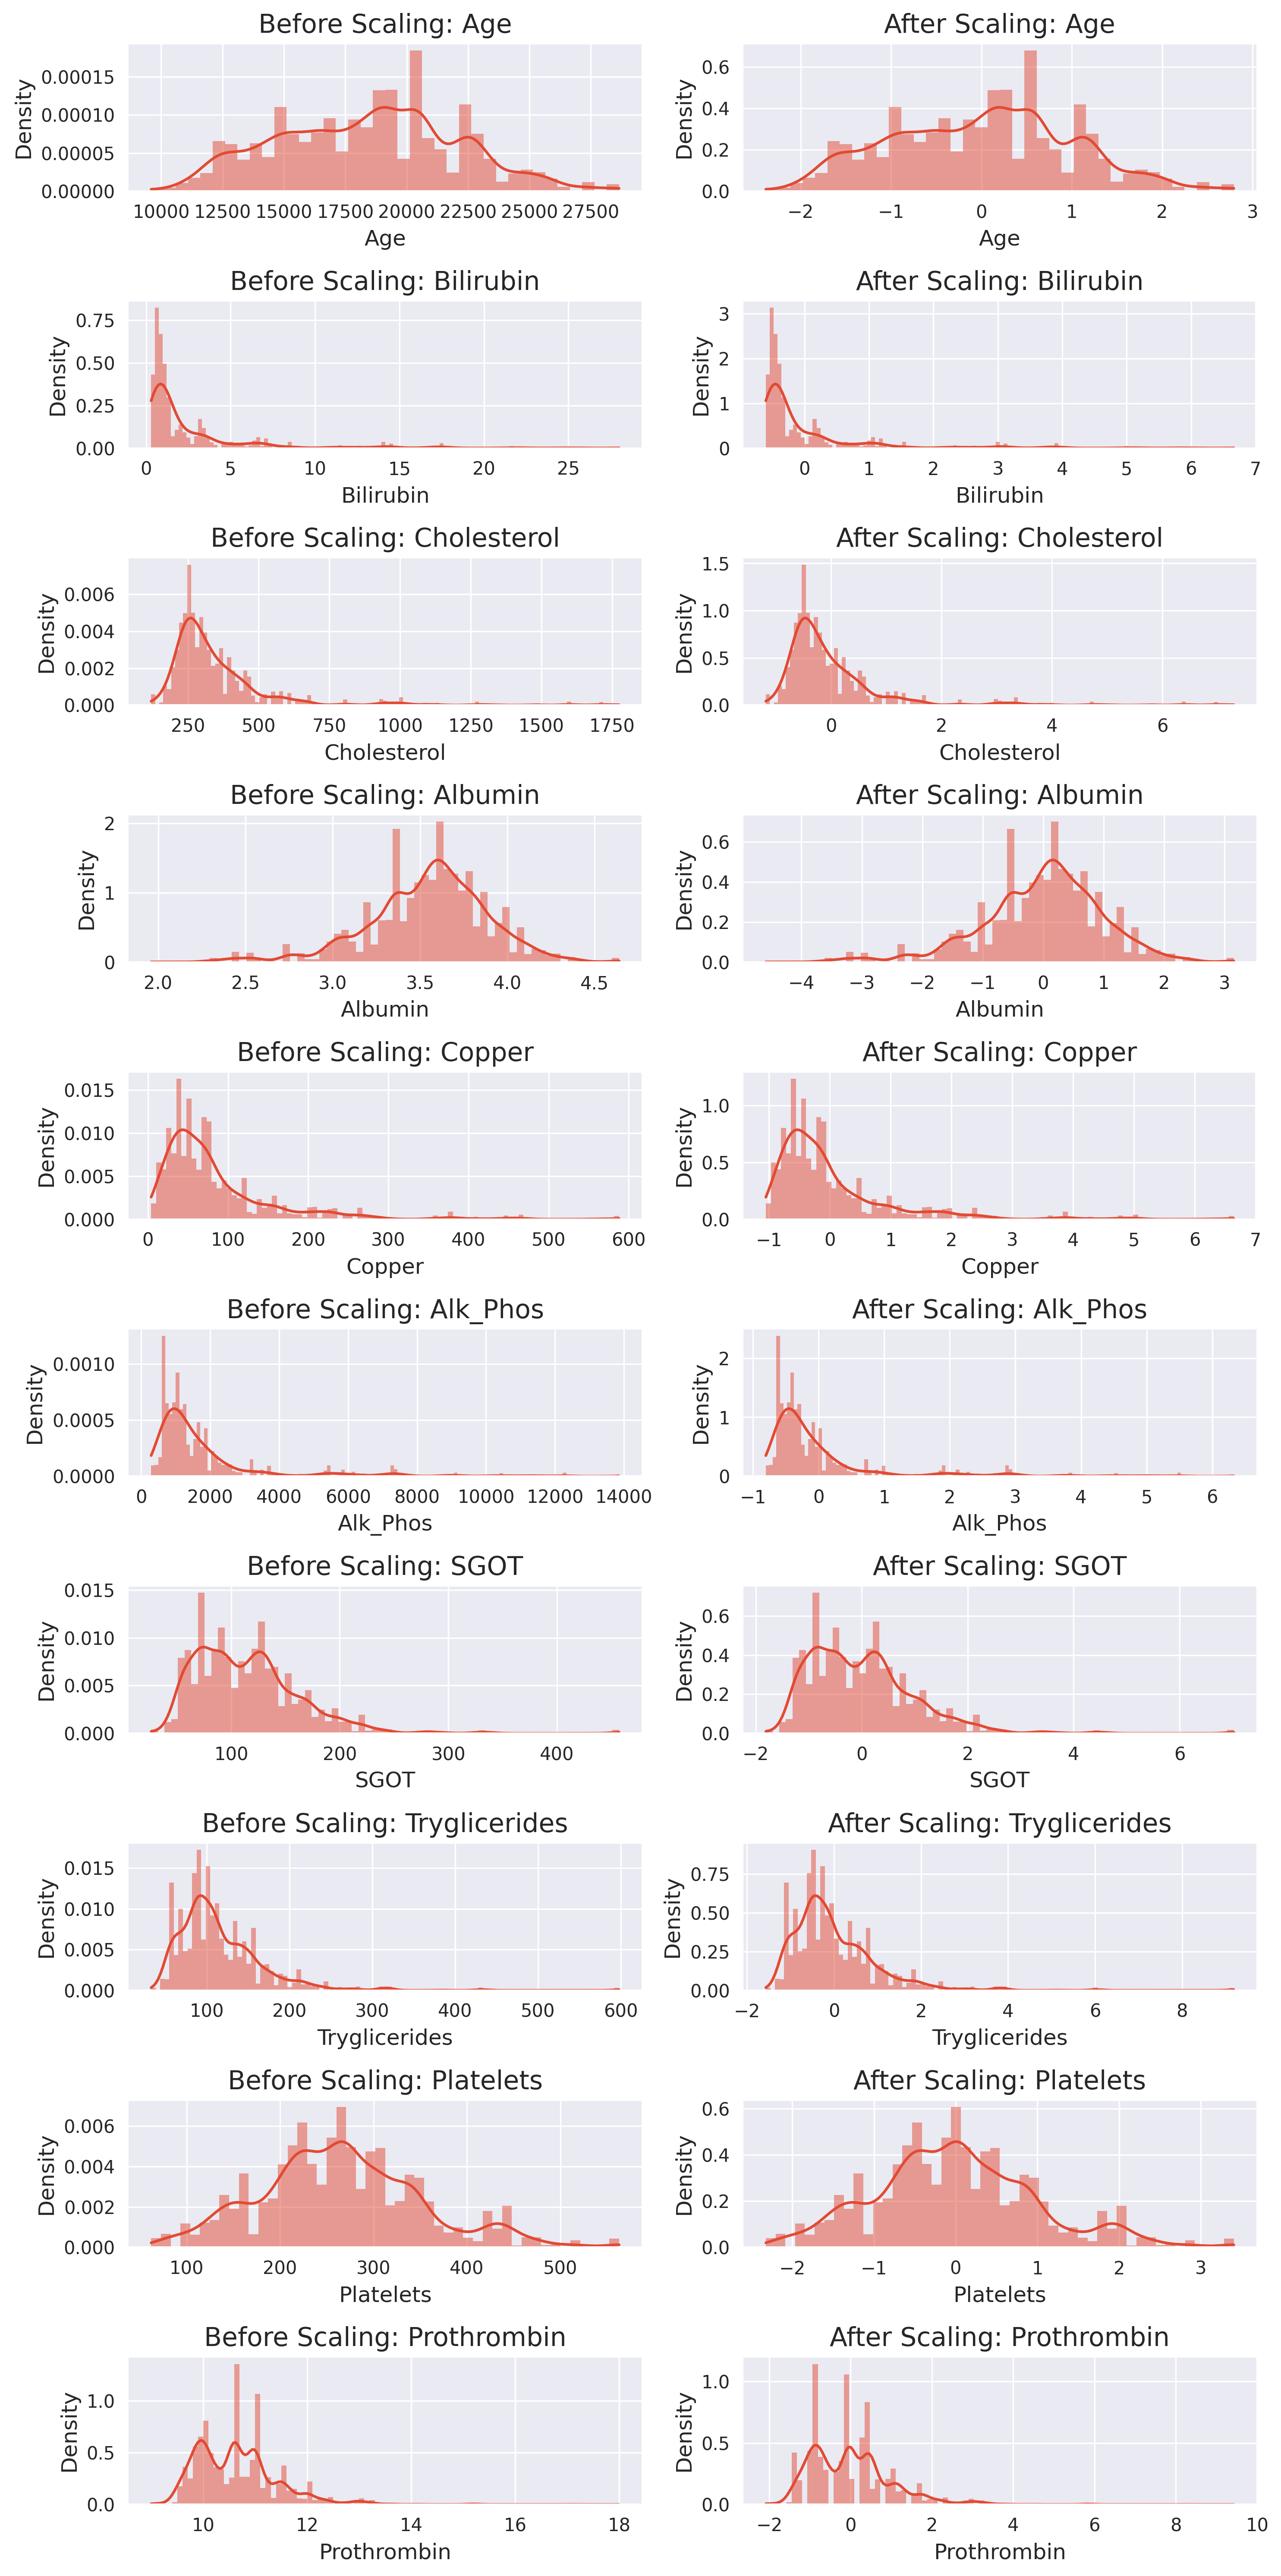

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Apply scaling
scaler = StandardScaler() # or MinMaxScaler
train_data_scaled = train_data.copy()
train_data_scaled[features_to_scale] = scaler.fit_transform(train_data_scaled[features_to_scale])

# Define the number of rows and columns for subplots
n_rows = len(features_to_scale)
n_cols = 2  # Two columns for before and after

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2 * n_rows), dpi=300)

# Plot histograms
for i, feature in enumerate(features_to_scale):
    # Before scaling
    sns.histplot(train_data[feature], kde=True, stat="density", linewidth=0, ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling: {feature}')
    
    # After scaling
    sns.histplot(train_data_scaled[feature], kde=True, stat="density", linewidth=0, ax=axes[i, 1])
    axes[i, 1].set_title(f'After Scaling: {feature}')

# Adjust layout
plt.tight_layout()
plt.show()


In [23]:
train_data_scaled

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_N,Edema_S,Edema_Y
0,0,999,1,0.858448,1,0,0,0,-0.077237,-0.176908,...,-0.113334,1.336304,-0.996442,1.472341,-1.189049,3.0,D,1,0,0
1,1,2574,0,0.234760,0,0,0,0,-0.444429,0.068784,...,-0.197909,0.414968,-0.520497,1.095026,0.474024,3.0,C,1,0,0
2,2,3428,0,-1.262634,0,0,1,1,0.185043,-0.263923,...,-0.413812,0.097266,-1.243933,-0.757248,1.369525,4.0,D,0,0,1
3,3,2576,0,0.023603,0,0,0,0,-0.523113,-0.484022,...,-0.086017,-0.887610,-0.368194,0.043117,0.090238,3.0,C,1,0,0
4,4,788,0,-0.466107,0,0,1,0,-0.391973,-0.023351,...,-0.333965,0.224347,-0.368194,0.374697,-0.037691,4.0,C,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,1,-0.416919,0,0,0,0,-0.470657,-0.212738,...,-0.098625,-0.728759,2.068644,0.900652,-0.933192,2.0,C,1,0,0
7901,7901,1492,0,-0.364741,0,0,1,0,-0.444429,-0.463548,...,-0.197909,0.561521,-0.710875,0.134588,-0.805263,4.0,C,1,0,0
7902,7902,1576,1,2.038155,0,0,0,1,-0.155921,-0.642698,...,-0.464242,-0.919380,-1.015479,-0.745814,2.648812,2.0,D,0,1,0
7903,7903,3584,1,1.246520,1,0,1,0,-0.496885,-0.524971,...,-0.427470,-1.173542,0.050637,-0.505705,-0.037691,4.0,D,1,0,0


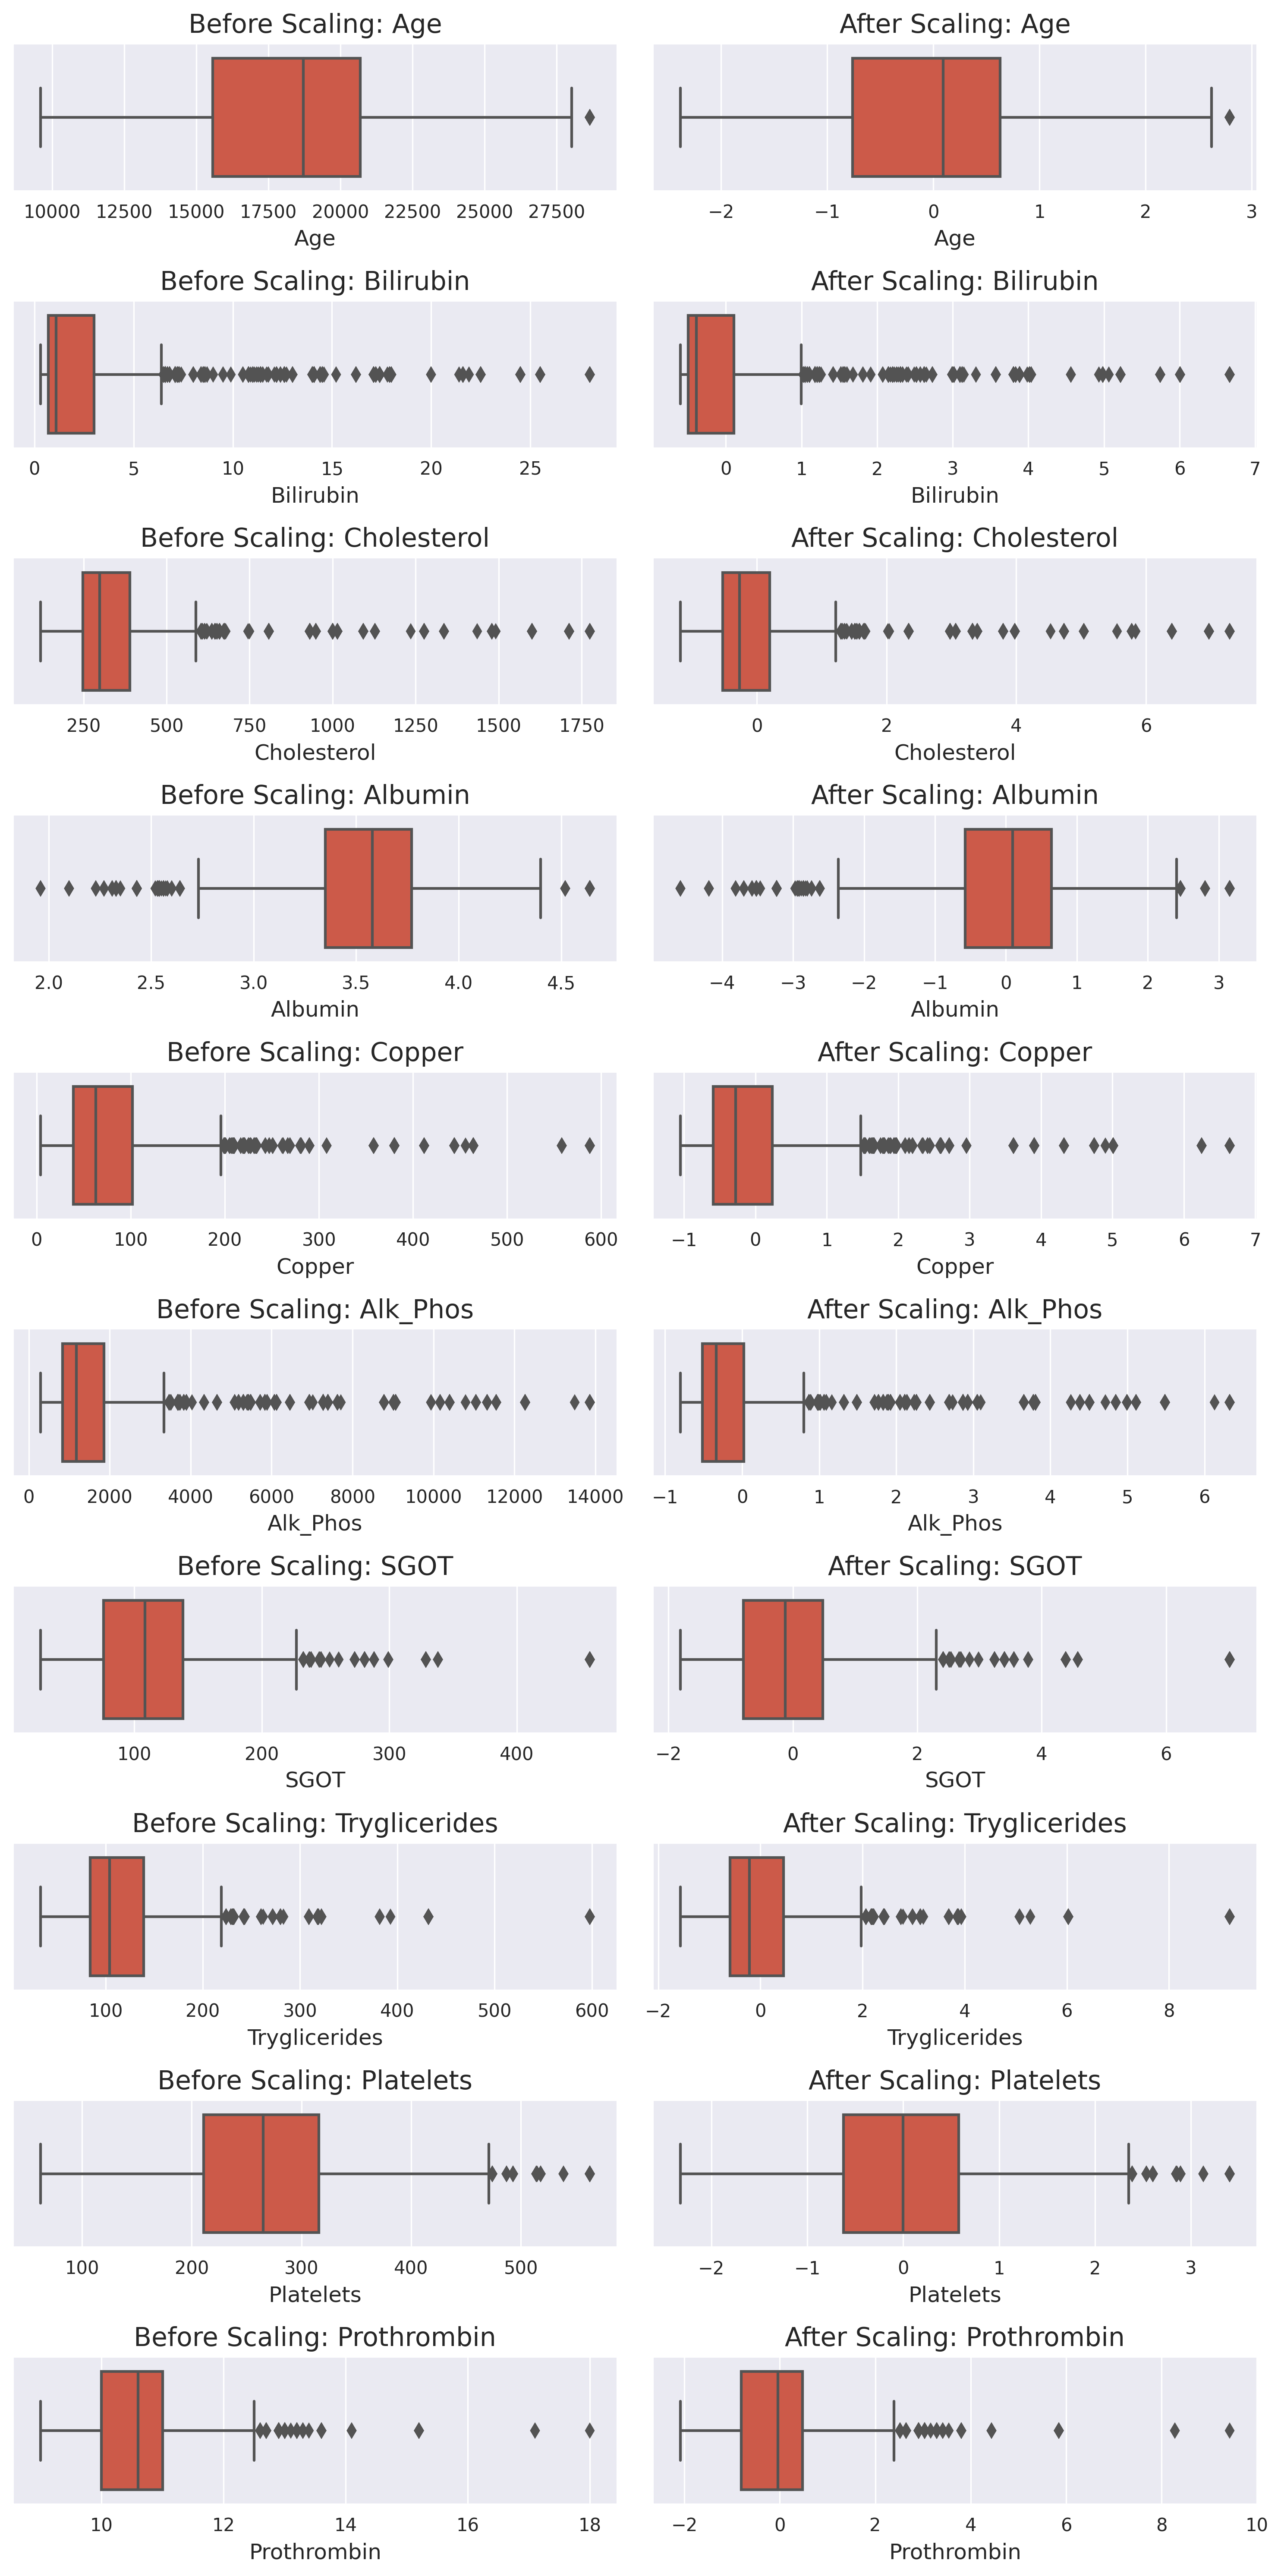

In [24]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2 * n_rows), dpi=300)

# Plot box plots
for i, feature in enumerate(features_to_scale):
    # Before scaling
    sns.boxplot(x=train_data[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling: {feature}')
    
    # After scaling
    sns.boxplot(x=train_data_scaled[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'After Scaling: {feature}')

# Adjust layout
plt.tight_layout()
plt.show()



---

### Report on Outlier Handling in Medical Dataset Analysis

#### Objective
This report outlines the rationale and implications of the decision to retain outliers in the analysis of a medical dataset focused on predicting outcomes for patients with cirrhosis.

#### Background
Our dataset comprises various medical parameters and patient outcomes, aimed at developing a predictive model for cirrhosis outcomes. During the data preprocessing phase, a thorough exploration revealed the presence of outliers across several key features.

#### Decision to Retain Outliers
After careful consideration, we have decided to retain the outliers within the dataset for the following reasons:

1. **Clinical Significance**: In medical datasets, outliers may represent rare but clinically significant cases. These extreme values often correspond to severe or unusual medical conditions that are crucial for understanding and predicting patient outcomes.

2. **Data Integrity**: Medical data inherently includes variations due to the diverse nature of human health and diseases. Removing these outliers could lead to a loss of valuable information, which is essential for a comprehensive analysis.

3. **Robustness of Chosen Models**: The models we plan to implement in our analysis, such as Random Forests and other ensemble methods, are known for their robustness to outliers. These models can handle outliers effectively, ensuring that our analysis is not overly sensitive to these extreme values while still considering their potential impact.

4. **Domain Expertise and Literature Support**: Consultations with medical experts and relevant literature suggest that in the context of cirrhosis, extreme values in certain parameters can be indicative of advanced or complicated cases. Therefore, their inclusion is vital for the accuracy and relevance of our predictive modeling.

#### Methodology
We employed statistical and machine learning models capable of handling outliers effectively. This approach ensures that our models are not unduly influenced by these extreme values but still consider their impact. Additionally, we conducted feature engineering to appropriately integrate and represent these outliers in our analysis.

#### Conclusion
In conclusion, the decision to retain outliers in our dataset is driven by the necessity to preserve the integrity and richness of medical data and to ensure that our predictive models are as accurate and representative as possible of the diverse range of medical scenarios in cirrhosis. This approach underscores our commitment to developing reliable and clinically relevant predictive tools that are robust in the presence of atypical data points.

---

In [25]:
train_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_N,Edema_S,Edema_Y
0,0,999,1,21532,1,0,0,0,2.3,316.0,...,1601.0,179.80,63.0,394.0,9.7,3.0,D,1,0,0
1,1,2574,0,19237,0,0,0,0,0.9,364.0,...,1440.0,134.85,88.0,361.0,11.0,3.0,C,1,0,0
2,2,3428,0,13727,0,0,1,1,3.3,299.0,...,1029.0,119.35,50.0,199.0,11.7,4.0,D,0,0,1
3,3,2576,0,18460,0,0,0,0,0.6,256.0,...,1653.0,71.30,96.0,269.0,10.7,3.0,C,1,0,0
4,4,788,0,16658,0,0,1,0,1.1,346.0,...,1181.0,125.55,96.0,298.0,10.6,4.0,C,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,1,16839,0,0,0,0,0.8,309.0,...,1629.0,79.05,224.0,344.0,9.9,2.0,C,1,0,0
7901,7901,1492,0,17031,0,0,1,0,0.9,260.0,...,1440.0,142.00,78.0,277.0,10.0,4.0,C,1,0,0
7902,7902,1576,1,25873,0,0,0,1,2.0,225.0,...,933.0,69.75,62.0,200.0,12.7,2.0,D,0,1,0
7903,7903,3584,1,22960,1,0,1,0,0.7,248.0,...,1003.0,57.35,118.0,221.0,10.6,4.0,D,1,0,0


In [26]:
import pandas as pd

# Assuming train_data is your DataFrame

# Store the 'Status' column in a temporary variable
status = train_data_scaled['Status']

# Drop the 'Status' column from the original DataFrame
train_data_scaled = train_data_scaled.drop('Status', axis=1)

# Add the 'Status' column back, but now it will be at the end
train_data_scaled['Status'] = status


In [27]:
train_data_scaled

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y,Status
0,0,999,1,0.858448,1,0,0,0,-0.077237,-0.176908,...,-0.113334,1.336304,-0.996442,1.472341,-1.189049,3.0,1,0,0,D
1,1,2574,0,0.234760,0,0,0,0,-0.444429,0.068784,...,-0.197909,0.414968,-0.520497,1.095026,0.474024,3.0,1,0,0,C
2,2,3428,0,-1.262634,0,0,1,1,0.185043,-0.263923,...,-0.413812,0.097266,-1.243933,-0.757248,1.369525,4.0,0,0,1,D
3,3,2576,0,0.023603,0,0,0,0,-0.523113,-0.484022,...,-0.086017,-0.887610,-0.368194,0.043117,0.090238,3.0,1,0,0,C
4,4,788,0,-0.466107,0,0,1,0,-0.391973,-0.023351,...,-0.333965,0.224347,-0.368194,0.374697,-0.037691,4.0,1,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,1,-0.416919,0,0,0,0,-0.470657,-0.212738,...,-0.098625,-0.728759,2.068644,0.900652,-0.933192,2.0,1,0,0,C
7901,7901,1492,0,-0.364741,0,0,1,0,-0.444429,-0.463548,...,-0.197909,0.561521,-0.710875,0.134588,-0.805263,4.0,1,0,0,C
7902,7902,1576,1,2.038155,0,0,0,1,-0.155921,-0.642698,...,-0.464242,-0.919380,-1.015479,-0.745814,2.648812,2.0,0,1,0,D
7903,7903,3584,1,1.246520,1,0,1,0,-0.496885,-0.524971,...,-0.427470,-1.173542,0.050637,-0.505705,-0.037691,4.0,1,0,0,D


In [28]:

# Drop the 'id' column
train_data_scaled = train_data_scaled.drop('id', axis=1)

In [29]:
train_data_scaled

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y,Status
0,999,1,0.858448,1,0,0,0,-0.077237,-0.176908,-0.572940,...,-0.113334,1.336304,-0.996442,1.472341,-1.189049,3.0,1,0,0,D
1,2574,0,0.234760,0,0,0,0,-0.444429,0.068784,-0.024043,...,-0.197909,0.414968,-0.520497,1.095026,0.474024,3.0,1,0,0,C
2,3428,0,-1.262634,0,0,1,1,0.185043,-0.263923,0.004846,...,-0.413812,0.097266,-1.243933,-0.757248,1.369525,4.0,0,0,1,D
3,2576,0,0.023603,0,0,0,0,-0.523113,-0.484022,-0.139601,...,-0.086017,-0.887610,-0.368194,0.043117,0.090238,3.0,1,0,0,C
4,788,0,-0.466107,0,0,1,0,-0.391973,-0.023351,0.293739,...,-0.333965,0.224347,-0.368194,0.374697,-0.037691,4.0,1,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,1,-0.416919,0,0,0,0,-0.470657,-0.212738,0.033735,...,-0.098625,-0.728759,2.068644,0.900652,-0.933192,2.0,1,0,0,C
7901,1492,0,-0.364741,0,0,1,0,-0.444429,-0.463548,-0.341826,...,-0.197909,0.561521,-0.710875,0.134588,-0.805263,4.0,1,0,0,C
7902,1576,1,2.038155,0,0,0,1,-0.155921,-0.642698,-1.035169,...,-0.464242,-0.919380,-1.015479,-0.745814,2.648812,2.0,0,1,0,D
7903,3584,1,1.246520,1,0,1,0,-0.496885,-0.524971,-2.306298,...,-0.427470,-1.173542,0.050637,-0.505705,-0.037691,4.0,1,0,0,D


## <font color='289C4E'>With the data now properly preprocessed, scaled, and ready, we can proceed to the next steps in our machine learning workflow:<font><a class='anchor' id='top'></a>

Splitting the Dataset into Training and Testing Sets:

Divide your data into a training set and a testing set. This split is essential for evaluating your model's performance on unseen data.

You can use the train_test_split function from sklearn.model_selection. A common practice is to use around 70-30 or 80-20 split between training and testing sets.


In [30]:
from sklearn.model_selection import train_test_split

# Assuming 'Status' is your target variable
X = train_data_scaled.drop('Status', axis=1)  # Features
y = train_data_scaled['Status']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42)  # Adjust test_size as needed


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           C       0.80      0.82      0.81       966
          CL       0.15      0.19      0.17        52
           D       0.69      0.64      0.67       563

    accuracy                           0.74      1581
   macro avg       0.55      0.55      0.55      1581
weighted avg       0.74      0.74      0.74      1581

Confusion Matrix:
 [[795  28 143]
 [ 23  10  19]
 [174  27 362]]


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
dt = DecisionTreeClassifier()

# Define a grid of hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Setup Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform grid search on the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_sa

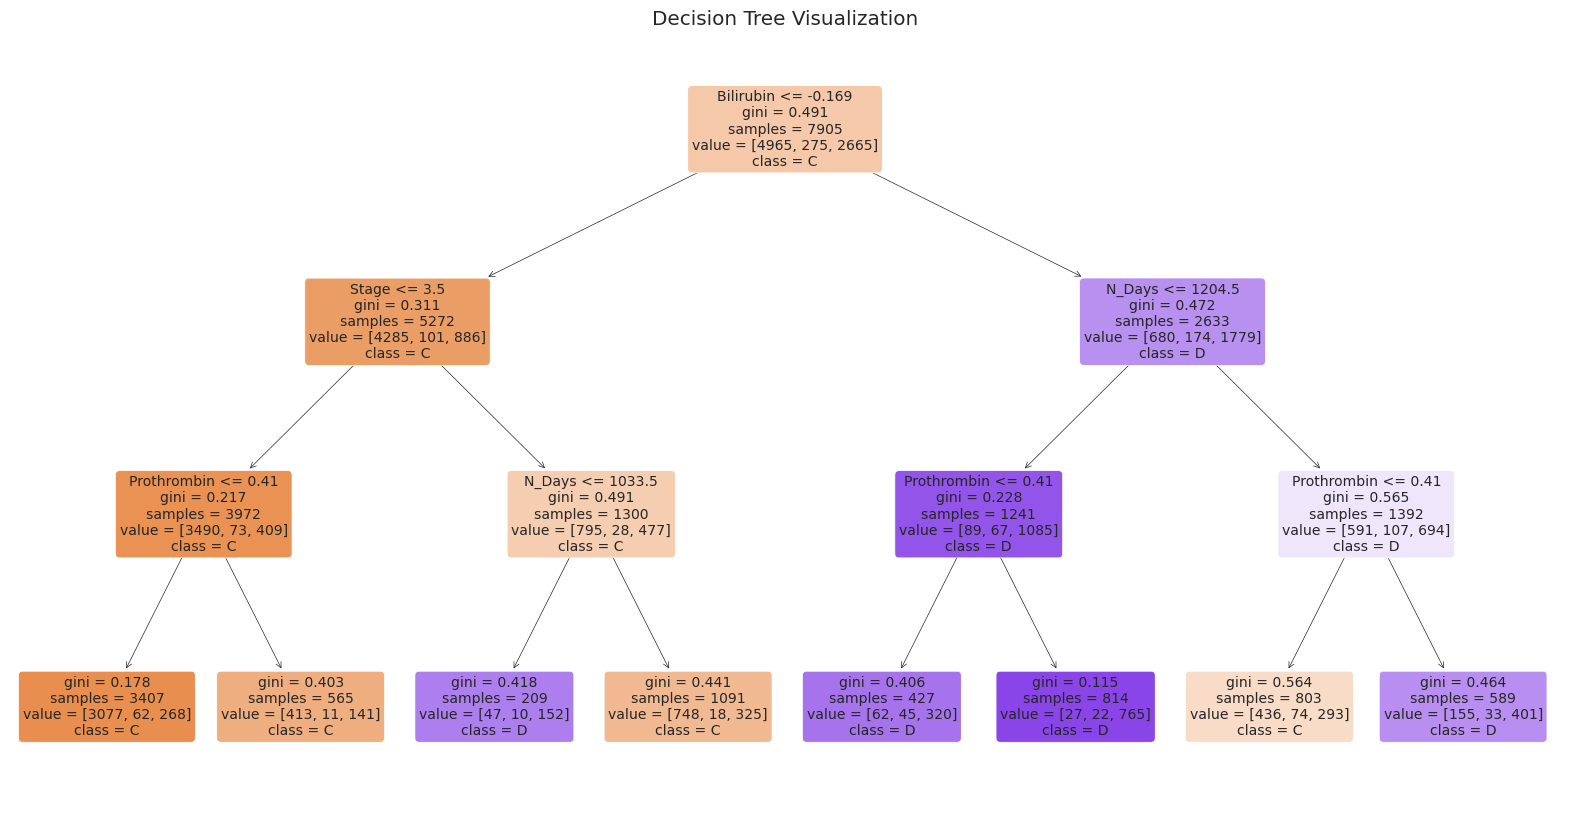

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are your training dataset and labels
# Replace this with your trained Decision Tree model
dt = DecisionTreeClassifier(max_depth=3)  # Limiting depth for visualization purposes
dt.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=dt.classes_, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss

# Create a Logistic Regression model
# multi_class='multinomial' is used for multi-class classification
# 'lbfgs' solver is a good default choice
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)  # Increase max_iter if needed

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Predicted probabilities for evaluating log loss
y_pred_proba = logreg.predict_proba(X_test)

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_proba))

# You can also calculate other metrics such as accuracy, precision, recall, F1-score as needed


Classification Report:
               precision    recall  f1-score   support

           C       0.79      0.92      0.85       966
          CL       0.00      0.00      0.00        52
           D       0.79      0.65      0.72       563

    accuracy                           0.79      1581
   macro avg       0.53      0.52      0.52      1581
weighted avg       0.77      0.79      0.77      1581

Confusion Matrix:
 [[886   0  80]
 [ 35   0  17]
 [195   0 368]]
Log Loss: 0.5311430531676397


## <font color='289C4E'>Break down of model<font><a class='anchor' id='top'></a>

Importing Libraries:

LogisticRegression: This is the Logistic Regression model from scikit-learn's linear_model module. It's used for both binary and multi-class classification tasks.
classification_report, confusion_matrix, log_loss: These are functions from sklearn.metrics. They're used to evaluate the performance of the model.

Creating a Logistic Regression Model:
LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000): This line creates an instance of the Logistic Regression model.
multi_class='multinomial': This specifies that the model should use the multinomial logistic regression algorithm, which is suitable for multi-class classification problems.
solver='lbfgs': This is the optimization algorithm used for finding the model parameters that minimize the cost function. 'lbfgs' is a good default choice for most cases.
max_iter=1000: This sets the maximum number of iterations taken for the solvers to converge. Increasing max_iter can help the model converge, especially if your dataset is large or complex.

Model Training:
logreg.fit(X_train, y_train): This line trains the Logistic Regression model using the training data. X_train contains the feature data, and y_train contains the corresponding labels.
Making Predictions:
y_pred = logreg.predict(X_test): After the model is trained, this line is used to predict the labels for the test dataset (X_test). The predictions are stored in y_pred.
y_pred_proba = logreg.predict_proba(X_test): This line gets the probability estimates for each class for the test dataset. These probabilities are needed to calculate the log loss.

Model Evaluation:
classification_report(y_test, y_pred): This function generates a text report showing the main classification metrics (precision, recall, F1-score, etc.) for each class.
confusion_matrix(y_test, y_pred): This function computes the confusion matrix, which is a table used to describe the performance of a classification model. It helps to visualize the true vs. predicted labels.
log_loss(y_test, y_pred_proba): This calculates the logarithmic loss (or log loss), which measures the performance where the predicted output is a probability value between 0 and 1. The log loss penalizes both types of errors, but especially those predictions that are confident and wrong.

The classification report and the confusion matrix provide valuable insights into the performance of our Logistic Regression model. Let's break them down:

### Classification Report

This report shows several key metrics for each class in our multi-class classification task:

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It answers, "Of all patients labeled as a specific status, how many were actually that status?"
- **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all observations in the actual class. It answers, "Of all patients that truly have a specific status, how many did we label?"
- **F1-Score**: The weighted average of Precision and Recall. It takes both false positives and false negatives into account. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
- **Support**: The number of actual occurrences of the class in the specified dataset.

For our classes ('C', 'CL', 'D'), these metrics are calculated as follows:

- **Class C**:
  - Precision: 80% (of all patients predicted as 'C', 80% were actually 'C').
  - Recall: 92% (of all actual 'C' patients, 92% were correctly predicted as 'C').
  - F1-Score: 85% (balance between precision and recall for 'C').
  - Support: 966 (total number of actual 'C' cases in the test set).
- **Class CL**:
  - Precision, Recall, F1-Score are all 0%, indicating that the model failed to correctly identify any 'CL' cases. The model struggles with this class, possibly due to its underrepresentation in the dataset.
- **Class D**:
  - Precision: 79%, Recall: 66%, F1-Score: 72%.

- **Overall**:
  - he accuracy across all classes is 79%.
  - The macro average and weighted average for precision, recall, and F1-score are provided, indicating the model's overall performance.
### Confusion Matrix

The confusion matrix is a table used to describe the performance of a classification model. Each row represents the instances in an actual class, while each column represents instances in a predicted class. For our model:

- **First Row (Class C)**: Out of 966 actual 'C' cases, 886 were correctly predicted as 'C', but 80 were incorrectly predicted as 'D'.
- **Second Row (Class CL)**: All 52 actual 'CL' cases were misclassified (35 as 'C', 17 as 'D').
- **Third Row (Class D)**: Out of 563 actual 'D' cases, 370 were correctly predicted as 'D', but 193 were misclassified as 'C'.

### Log Loss

- **Log Loss**: It measures the uncertainty of the probabilities of our predictions. A lower log loss indicates better predictions. The log loss has decreased to 0.5303, indicating an improvement in the model's confidence in its predictions. A lower log loss value signifies better predictions.

### Interpretation

- The model's overall accuracy has improved to 79%.
- Performance for classes 'C' and 'D' is reasonably good, but the model is still unable to correctly classify any instances of class 'CL'. This could be due to a lack of sufficient representative data for 'CL' or inherent similarities between 'CL' and other classes that make it difficult for the model to distinguish.
- The log loss improvement suggests better calibrated probabilities being output by the model, which is a positive sign, especially for probabilistic classifiers like Logistic Regression.


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Perform cross-validation
# cv=5 means 5 folds; adjust this as needed
# scoring='accuracy' means that we're focusing on the accuracy metric; you can change this as needed
scores = cross_val_score(logreg, X, y, cv=7, scoring='accuracy')

print("Cross-validated scores:", scores)
print("Average score:", scores.mean())


Cross-validated scores: [0.78761062 0.78761062 0.79805137 0.78830824 0.79362267 0.79982285
 0.79893711]
Average score: 0.7934233555309455


In [36]:
from sklearn.linear_model import LogisticRegression

# Assuming 'Status' is your target variable and train_data is your full training dataset
X = train_data_scaled.drop('Status', axis=1)  # Features
y = train_data_scaled['Status']  # Target

# Initialize the Logistic Regression model
# Use the best hyperparameters from your tuning (if applicable)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on the full training dataset
logreg.fit(X, y)

# Now the model is trained on the full dataset and ready for making predictions on the test set


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [37]:
test_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [38]:
# Convert 'Drug' to binary format
# Assuming 'D-penicillamine' is the drug, map it to 1, and 'Placebo' to 0
test_data['Drug'] = test_data['Drug'].map({'D-penicillamine': 1, 'Placebo': 0})

# Convert binary features
test_data['Sex'] = test_data['Sex'].map({'M': 1, 'F': 0})
test_data['Ascites'] = test_data['Ascites'].map({'Y': 1, 'N': 0})
test_data['Hepatomegaly'] = test_data['Hepatomegaly'].map({'Y': 1, 'N': 0})
test_data['Spiders'] = test_data['Spiders'].map({'Y': 1, 'N': 0})


# Apply one-hot encoding to the 'Edema' column
edema_dummies = pd.get_dummies(test_data['Edema'], prefix='Edema')

# Concatenate the new columns to the original DataFrame
test_data = pd.concat([test_data, edema_dummies], axis=1)

# Optionally, drop the original 'Edema' column if no longer needed
test_data = test_data.drop('Edema', axis=1)

# Convert the True/False values to 1/0
test_data['Edema_N'] = test_data['Edema_N'].astype(int)
test_data['Edema_Y'] = test_data['Edema_Y'].astype(int)
test_data['Edema_S'] = test_data['Edema_S'].astype(int)
# Now, the columns 'Edema_N', 'Edema_Y', and 'Edema_S' will have values 1 or 0 instead of True or False.


features_to_scale = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Apply scaling
scaler = StandardScaler() # or MinMaxScaler
test_data_scaled = test_data.copy()
test_data_scaled[features_to_scale] = scaler.fit_transform(test_data_scaled[features_to_scale])


In [39]:
test_data_scaled

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y
0,7905,3839,1,0.342186,0,0,1,0,-0.363546,0.965540,...,-0.254101,-0.090552,0.782524,-0.480744,1.895231,-0.041463,2.0,1,0,0
1,7906,2468,1,-0.983033,0,0,0,0,-0.389506,1.534346,...,0.119925,-0.286401,0.782524,0.755049,-0.422762,-0.798430,2.0,1,0,0
2,7907,51,0,-1.492582,0,0,1,0,-0.155863,-1.005321,...,-0.499153,-0.439359,-0.895372,-0.271610,-0.582624,2.986409,4.0,0,0,1
3,7908,2330,1,0.561521,0,0,0,0,-0.519308,-0.296809,...,-0.576538,-0.649677,0.244331,-1.127159,0.068241,-0.041463,2.0,1,0,0
4,7909,1615,1,0.950520,0,0,1,0,-0.311625,-0.376641,...,0.468156,-0.362363,0.233097,0.203695,-0.491274,-1.050753,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,0,-1.735358,0,0,0,0,-0.337585,-0.251903,...,-0.125127,-0.240927,0.641593,-1.355306,-0.948022,-0.041463,3.0,1,0,0
5267,13172,1770,0,1.759492,0,0,0,0,-0.545268,-0.666034,...,0.468156,-0.593351,-0.705421,-0.404696,0.536407,-1.176914,3.0,1,0,0
5268,13173,3707,1,-0.420743,0,0,1,0,-0.467387,-0.187039,...,-0.924769,-0.090035,1.162425,-0.860989,1.849556,0.337021,3.0,1,0,0
5269,13174,1216,0,-1.876558,0,0,0,0,-0.493347,-0.117186,...,-0.421768,-0.585599,-1.155788,0.203695,0.479314,-0.546108,1.0,1,0,0


In [40]:
# Save the 'id' column for later use in the submission file
test_ids = test_data_scaled['id'].copy()

# Drop the 'id' column from the test dataset before making predictions
test_data_scaled_without_id = test_data_scaled.drop('id', axis=1)
# Make predictions on the test data (probabilities)
test_probabilities = logreg.predict_proba(test_data_scaled_without_id)

# Prepare the submission file
submission_df = pd.DataFrame(test_ids)  # Use the saved 'id' column

# Add predicted probabilities for each class to the submission DataFrame
# Adjust the column names and order as per Kaggle's requirement
submission_df['Status_C'] = test_probabilities[:, 0]  # Probabilities for class 'C'
submission_df['Status_CL'] = test_probabilities[:, 1]  # Probabilities for class 'CL'
submission_df['Status_D'] = test_probabilities[:, 2]  # Probabilities for class 'D'

# Saving the DataFrame to a CSV file for submission
submission_file_path = '/kaggle/working/submission.csv'  # Adjust the path as necessary
submission_df.to_csv(submission_file_path, index=False)

print(f"Submission file saved to: {submission_file_path}")


Submission file saved to: /kaggle/working/submission.csv
